In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from src.high_pass import window_hamming_high_pass


(100.0, 100.5)

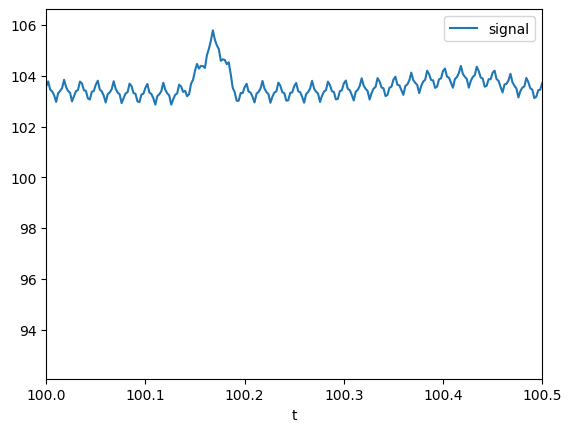

In [2]:
df = pd.read_csv('C:\\Users\\doxda\\OneDrive\\Documentos\\Repositorios\\master-degree-ufsc-electrical-engineering\\PSB\\T1\\data\\ECGtest03.csv')
df.plot(x='t', y='signal')
plt.xlim([100, 100.5])

In [3]:
fs = 500
dur = 480.4 # ~ 8 mins
N = int(fs * dur)
signal = df['signal'].to_numpy()
signal_filter = window_hamming_high_pass(signal, 50, 3, fs, dur)
df['signal_filter'] = signal_filter

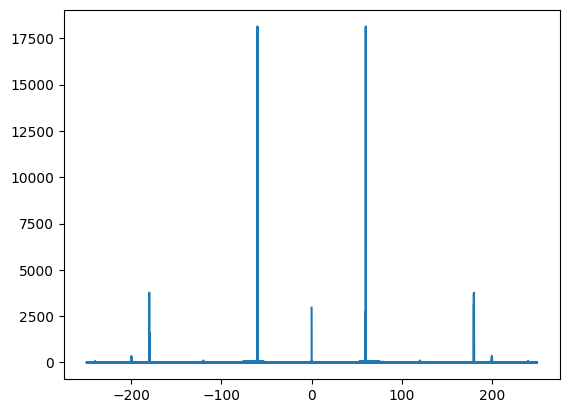

In [4]:
fs = 500
dur = 480.4 # ~ 8 mins
N = int(fs * dur)

yf = fft(signal_filter)
xf = fftfreq(N, 1 / fs)

plt.plot(xf, np.abs(yf))

(100.0, 100.5)

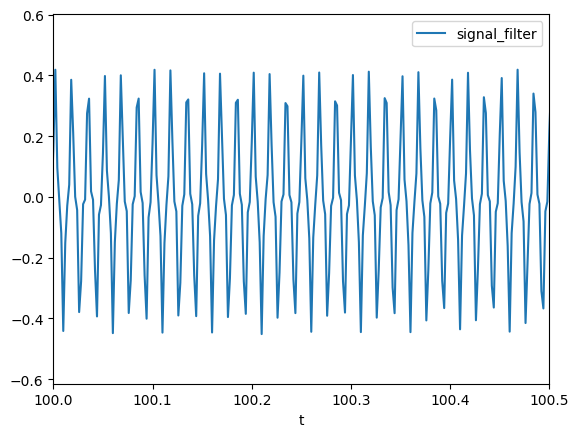

In [5]:
df.plot(x='t', y='signal_filter')
plt.xlim([100, 100.5])

<AxesSubplot: xlabel='t'>

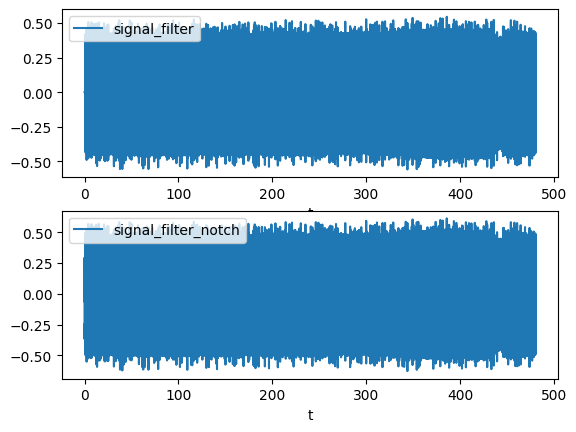

In [10]:
x = df['signal_filter'].to_numpy()
N = len(x)
y =  np.zeros(N)
for n in range(0, N):
    y[n] = x[n] - 1.9021*x[n-1] + x[n-2] + 1.8038*y[n-1] - 0.9483*y[n-2]

fig, axs = plt.subplots(2)
df['signal_filter_notch'] = y
df.plot(x='t', y='signal_filter', ax=axs[0])
df.plot(x='t', y='signal_filter_notch', ax=axs[1])

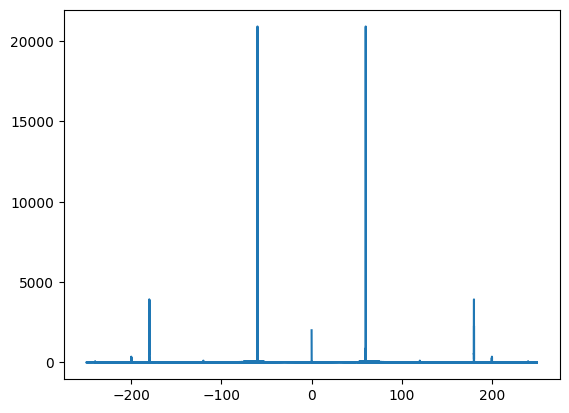

In [11]:
fs = 500
dur = 480.4 # ~ 8 mins
N = int(fs * dur)

signal_filter_notch = df['signal_filter_notch'].to_numpy()
yf = fft(signal_filter_notch)
xf = fftfreq(N, 1 / fs)

plt.plot(xf, np.abs(yf))